In [1]:
import os
import pandas as pd
from pandas_profiling import ProfileReport
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [ ]:
# Reference: https://www.kaggle.com/bryanb/survival-analysis-with-cox-model-implementation

In [2]:
input_file = '/Users/pratikshirbhate/Documents/DataScience/projects/survival_modelling/data/raw/haberman.csv'

In [3]:
df = pd.read_csv(input_file)

In [4]:
df.head()

,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.columns

Index(['Age', 'Operation_year', 'Nb_pos_detected', 'Surv'], dtype='object')

In [6]:
#ProfileReport(df)

<AxesSubplot:xlabel='timeline'>

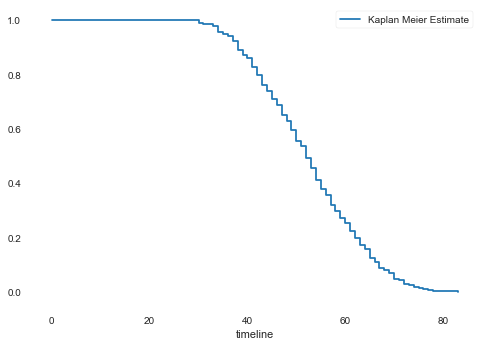

In [7]:
T = df.Age
E = df.Surv

## create a kmf object
km = KaplanMeierFitter() 

## Fit the data into the model
km.fit(T, E,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, not showing it.

<AxesSubplot:xlabel='timeline'>

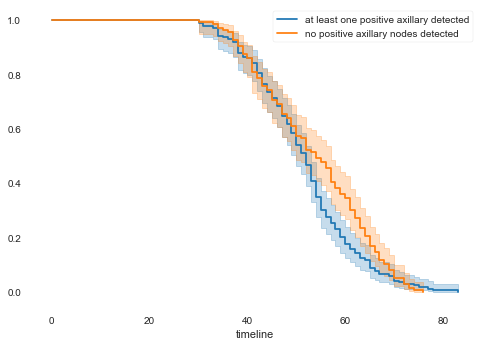

In [8]:
## Instantiate the class to create an object
km_2 = KaplanMeierFitter()

## creating 2 cohorts : with at least one positive axillary detected, and one with no one detected
groups = df['Nb_pos_detected']   
i1 = (groups >= 1)   
i2 = (groups < 1)     


## fit the model for 1st cohort
km_2.fit(T[i1], E[i1], label='at least one positive axillary detected')
a1 = km_2.plot()

## fit the model for 2nd cohort
km_2.fit(T[i2], E[i2], label='no positive axillary nodes detected')
km_2.plot(ax=a1)

In [9]:
## Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df, 'Age', event_col='Surv')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<AxesSubplot:xlabel='log(HR) (95% CI)'>

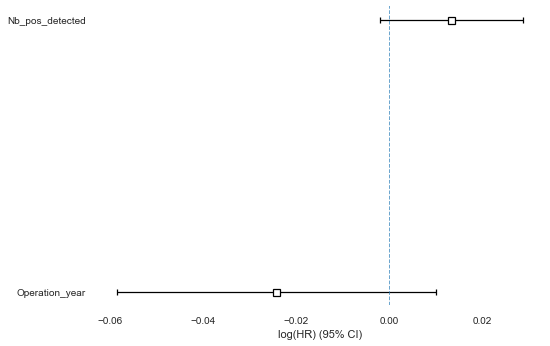

In [10]:
cph.plot()

In [11]:
## I want to see the Survival curve at the patient level.
## Random patients
patients = [4,125,211]

rows_selected = df.iloc[patients, 1:3]
rows_selected

,Operation_year,Nb_pos_detected
4,65,4
125,64,0
211,67,0


<AxesSubplot:>

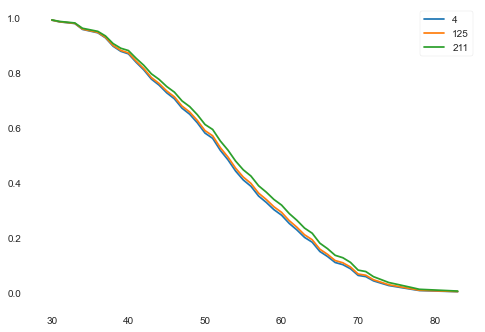

In [12]:
## Lets predict the survival curve for the selected patients. 
## Patients can be identified with the help of the number mentioned against each curve.
cph.predict_survival_function(rows_selected).plot()